
# Code-Along Assignment: Analyzing Experimental Data with Pandas and Simulations

In this code-along assignment, you’ll use sample data to answer this question:

Does an energy drink help people run faster?

You'll work with a CSV file containing run times for a treatment group (drank
energy drink) and a control group (did not drink energy drink). You'll use Pandas, NumPy, and SciPy to
explore the data and simulate possible outcomes.



## Scenario

The company behind an energy drink called FastFeet says it helps people run faster. You’re given a sample of 200 runners. Half drank the drink, half drank water. Can you prove it works?


## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)

## Load the Sample Data

In [2]:
df = pd.read_csv("data/combined_runners.csv")
df.head()

,ParticipantID,Group,RunTimeSeconds
0,C001,Control,352.92
1,C002,Control,312.00
2,C003,Control,329.36
3,C004,Control,367.23
4,C005,Control,356.03


Questions:
* How many rows are in the sample? There are five rows.
* If `combined_runners.csv` is the sample, what is the population? The participants in both groups.
* What is the easiest tool in pandas to check for null values and data types
  for our columns? df.info


## Explore Group Statistics

This block of code gives you basic summary statistics for the treatment and
control groups. It helps us understand the average times, how spread out they
are, and how many people are in each group.  

* Control = People who drank water
* Treatment = People who drank energy drink


In [4]:
df.groupby("Group")["RunTimeSeconds"].agg(["mean", "min", "max", "count"])

,mean,min,max,count
Group,,,,
Control,301.7941,223.41,368.09,100
Treatment,297.4604,228.30,366.49,100


Questions:
* What other pandas tools could you use to get information like mean, min, max,
  or count?
* What does the `.groupby()` function do? 
* Is there a difference between 
  `df.groupby("Group")["RunTimeSeconds"].agg(["mean"])` and
  `df.groupby("Group")["RunTimeSeconds"].mean()` 


## Measure the Observed Difference

Now we calculate the difference in average run time between the two groups. This will tell us how much faster or slower the treatment group was.


In [6]:
means = df.groupby("Group")["RunTimeSeconds"].mean()
print(means)

Group
Control      301.7941
Treatment    297.4604
Name: RunTimeSeconds, dtype: float64


In [7]:
observed_diff = means["Treatment"] - means["Control"]
print(observed_diff)

-4.333700000000022


In [8]:
print("Observed Difference (Treatment - Control):", observed_diff)

Observed Difference (Treatment - Control): -4.333700000000022


Questions:
* Why is `observed_diff` a negative value? What is being measured?
* How is `observed_diff` being calculated?
* What would an `observed_diff` of 0 mean?
* What might it mean if the difference for the treatment group is small but
  very consistent (almost all people see a small improvement)
* What might it mean if the difference is large in some cases but no difference
  in other cases?


## Perform a t-Test

This step checks if the observed difference is statistically significant. A t-test compares the two groups and gives a p-value to help us decide if the difference is likely due to chance.


In [13]:
control = df[df["Group"] == "Control"]["RunTimeSeconds"]
print(control)



0     352.92
1     312.00
2     329.36
3     367.23
4     356.03
       ...  
95    321.20
96    300.32
97    353.58
98    303.81
99    312.06
Name: RunTimeSeconds, Length: 100, dtype: float64


In [15]:
treatment = df[df["Group"] == "Treatment"]["RunTimeSeconds"]
print(treatment)

100    351.49
101    254.57
102    256.89
103    324.08
104    259.81
        ...  
195    289.85
196    318.15
197    319.71
198    359.90
199    335.10
Name: RunTimeSeconds, Length: 100, dtype: float64


In [16]:
t_stat, p_val = stats.ttest_ind(treatment, control)

In [17]:
print("T-statistic:", t_stat)
print("p-value:", p_val)

T-statistic: -0.9950943610332018
p-value: 0.32090490597475396


Questions:
* What are we trying to test in the above example? What information do we want
  to know?
* What is the control group and what purpose does it serve?
* What is the treatment group and what purpose does it serve?
* What information does a p-value give us?
* What information does the test statistic give us?
  


## Simulate the Effect of Two Drinks

If one energy drink helps, what happens if a person drinks two? This section creates a new dataset where the treatment group gets an extra boost equal to the original improvement.


In [18]:
df_two_drinks = df.copy()

In [19]:
boost = abs(observed_diff)

In [20]:
df_two_drinks.loc[df_two_drinks["Group"] == "Treatment", "RunTimeSeconds"] -= boost

In [21]:
means_2x = df_two_drinks.groupby("Group")["RunTimeSeconds"].mean()
observed_diff_2x = means_2x["Treatment"] - means_2x["Control"]
print("New Observed Difference (2 Drinks):", observed_diff_2x)

New Observed Difference (2 Drinks): -8.667400000000214


Questions:

* Why do we use `abs(observed_diff)` in this scenario? Hint: (`abs()` will
  always return positive value)
* What assumptions are we making by applying the same speed "boost" to runners
  with two energy drinks? Is the reasonable in the real world? Would three
  energy drinks give you three times the speed boosting effect?
* Why might simulating two drinks be useful even if no one in the sample drank two?



## Visualize the Two-Drink Effect

This section shows histograms of both the control group and the treatment group after simulating a second drink.


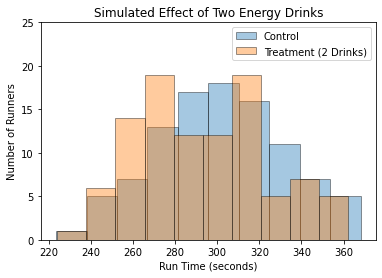

In [22]:
plt.hist(df["RunTimeSeconds"][df["Group"] == "Control"], alpha=0.4, label="Control", edgecolor="black")
plt.hist(df_two_drinks["RunTimeSeconds"][df_two_drinks["Group"] == "Treatment"], alpha=0.4, label="Treatment (2 Drinks)", edgecolor="black")
plt.xlabel("Run Time (seconds)")
plt.ylabel("Number of Runners")
plt.ylim(0, 25) # Added to avoid overlap of legend
plt.title("Simulated Effect of Two Energy Drinks")
plt.legend()



Questions:

* What do we notic about the shapes of the above overlapped histograms? What
  might these histograms tell us about the energy drink and runners?
* What other visualization would show us the distribution of the two groups,
  but would also include information about outliers in the plot?




## Final Reflection

Answer the following questions in markdown cells in your notebook:

* What is a sample, and why do we use it in experiments?
* Did the energy drink improve run times based on the sample?
* What happened when you simulated a second drink?
* Based on your analysis, would you recommend this product?


Questions:
* What role does simulation of two energy drinks above serve?


## Deliverables

* A Jupyter Notebook titled `pandas_energy_drink_analysis.ipynb` that includes:

  * All code cells and printed outputs
  * Answers to each markdown question
  * A short conclusion at the end: Does FastFeet help runners?

* Push your notebook to your GitHub repository and submit the link
